Name : Swetha Kumar

Date : 31.07.2024.

Project : HandWritten Digit Recognizer.

In [ ]:
!unzip '/content/train.csv.zip'

Archive:  /content/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip '/content/test.csv.zip'

###Approach for the handwritten digits:

Load the data and libraries.

Data Visualization.

Divide the data into X(images) and Y(Lables).

Divide the data into train and test.

Apply ML Algorithm and Evaluate.

Single layer perceptron and Evaluate.

Apply the multi layer perceptron and Evaluate.

Implement Deep Learning using TensorFlow and Keras.


###Load the data and Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Perceptron


In [ ]:
###Import Data:

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train.skew()

,0
label,0.026479
pixel0,0.000000
pixel1,0.000000
pixel2,0.000000
pixel3,0.000000
pixel4,0.000000
pixel5,0.000000
pixel6,0.000000
pixel7,0.000000
pixel8,0.000000


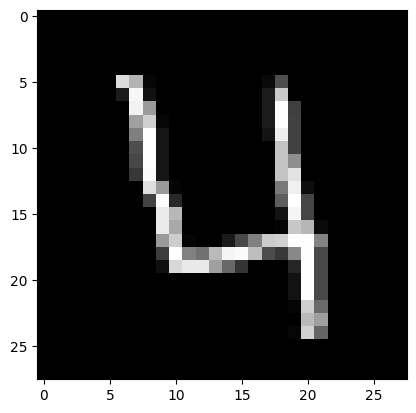

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0, 784)]
row_to_examine = 3
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(),(28,28))
_ = plt.imshow(image_data, cmap = "gray")

In [ ]:
### Split the data into X and Y:

In [ ]:
x = train.drop('label', axis=1)
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [ ]:
###Split the data into train and test:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


###LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train , y_train)
y_hat_train_logreg = log_reg.predict(x_train)
y_hat_test_logreg = log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, y_hat_train_logreg)

The accuracy of the model is: 0.94
[[3267    0    9    7    6   19   20    5   10    4]
 [   0 3667    8   14    1    5    3    5   25    7]
 [  12   27 3079   46   28   15   23   34   61   14]
 [   9    9   65 3206    1   80    7   20   72   24]
 [   4   10   14    3 3103    3   23   11   18   87]
 [  26    5   24   87   28 2680   38    9   77   21]
 [  16    4   15    0   14   31 3174    0   12    1]
 [   6    8   30   12   18    4    3 3354    7   99]
 [  16   42   25   71   12   74   14   10 2959   23]
 [  12    9    6   36   65   21    0   89   28 3095]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3347
           1       0.97      0.98      0.98      3735
           2       0.94      0.92      0.93      3339
           3       0.92      0.92      0.92      3493
           4       0.95      0.95      0.95      3276
           5       0.91      0.89      0.90      2995
           6       0.96      0.97      0.97      3267
 

In [ ]:
model_eval(y_test, y_hat_test_logreg)

The accuracy of the model is: 0.92
[[756   0   2   2   2  12   7   0   4   0]
 [  0 927   4   7   2   2   0   1   6   0]
 [  5  11 740  23  11   7  10   5  23   3]
 [  1   3  25 769   1  27   2   9  11  10]
 [  6   4   1   0 744   0   5   2   8  26]
 [  8   5   8  39   5 683  13   2  31   6]
 [ 10   2  11   1   5  18 822   0   1   0]
 [  4   6  11   3   4   3   0 789   5  35]
 [  7  20   5  21   1  26  12   4 709  12]
 [  5   1   1   8  25   7   0  23   5 752]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       785
           1       0.95      0.98      0.96       949
           2       0.92      0.88      0.90       838
           3       0.88      0.90      0.89       858
           4       0.93      0.93      0.93       796
           5       0.87      0.85      0.86       800
           6       0.94      0.94      0.94       870
           7       0.94      0.92      0.93       860
           8       0.88      0.87      0.88    

###RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
#fit the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is: 1.0
[[3347    0    0    0    0    0    0    0    0    0]
 [   0 3735    0    0    0    0    0    0    0    0]
 [   0    0 3339    0    0    0    0    0    0    0]
 [   0    0    0 3493    0    0    0    0    0    0]
 [   0    0    0    0 3276    0    0    0    0    0]
 [   0    0    0    0    0 2995    0    0    0    0]
 [   0    0    0    0    0    0 3267    0    0    0]
 [   0    0    0    0    0    0    0 3541    0    0]
 [   0    0    0    0    0    0    0    0 3246    0]
 [   0    0    0    0    0    0    0    0    0 3361]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      1.00      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00      1.00      1.00      3267
  

In [ ]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.96
[[772   0   2   1   1   1   3   1   4   0]
 [  0 931   8   3   1   1   2   0   2   1]
 [  2   3 809   7   3   2   2   3   6   1]
 [  1   1  13 817   0   7   0   9   7   3]
 [  0   2   0   0 775   0   3   1   5  10]
 [  3   2   2  16   1 766   5   0   4   1]
 [  3   1   0   0   1  11 852   0   2   0]
 [  0   4  14   1   6   1   0 827   1   6]
 [  3   6   3   6   4   6   3   0 777   9]
 [  5   0   2  10  16   3   0   8   6 777]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       785
           1       0.98      0.98      0.98       949
           2       0.95      0.97      0.96       838
           3       0.95      0.95      0.95       858
           4       0.96      0.97      0.97       796
           5       0.96      0.96      0.96       800
           6       0.98      0.98      0.98       870
           7       0.97      0.96      0.97       860
           8       0.95      0.95      0.95    

###ADABOOST CLASSIFIER:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [ ]:
model_eval(y_train, y_train_ada)

The accuracy of the model is: 0.74
[[2924    0  124   10   17  127   81   25   23   16]
 [   1 3460   57   30   10   19    3  104   47    4]
 [  54  112 1949   77   77   32  757  105  156   20]
 [ 138   84   89 2232   22  248   94  129  377   80]
 [  12   37  142   40 2487   43   53  147   81  234]
 [ 141   47   28  426   83 1839   99   33  186  113]
 [  76   57  281    9   48   85 2654    4   53    0]
 [  19   48   74   13   89   29    0 2906   42  321]
 [  27  234   89  180   53  149   74   49 2298   93]
 [  24   39  113   77  454   47    1  446   84 2076]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3347
           1       0.84      0.93      0.88      3735
           2       0.66      0.58      0.62      3339
           3       0.72      0.64      0.68      3493
           4       0.74      0.76      0.75      3276
           5       0.70      0.61      0.66      2995
           6       0.70      0.81      0.75      3267
 

In [ ]:
model_eval(y_test, y_hat_test_ada)

The accuracy of the model is: 0.73
[[695   0  28   1   1  31  17   3   6   3]
 [  0 881  13   5   2   7   2  22  17   0]
 [ 15  27 503  24  12  10 186  16  40   5]
 [ 29  15  17 560   2  58  20  33 103  21]
 [  2  13  37   7 605   9   9  40  18  56]
 [ 32  14   5 134  13 469  28  15  63  27]
 [ 26  16  71   5  17  31 688   4  12   0]
 [  7   6  25   2  23   6   0 696   8  87]
 [  7  72  26  57  13  40  22  10 550  20]
 [  6   4  34  20 104   8   0 127  16 508]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       785
           1       0.84      0.93      0.88       949
           2       0.66      0.60      0.63       838
           3       0.69      0.65      0.67       858
           4       0.76      0.76      0.76       796
           5       0.70      0.59      0.64       800
           6       0.71      0.79      0.75       870
           7       0.72      0.81      0.76       860
           8       0.66      0.67      0.67    

###GRADIENT BOOSTING:

In [ ]:
gb= GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

KeyboardInterrupt: 

In [ ]:
model_eval(y_train, y_train_gb)

In [ ]:
model_eval(y_test, y_hat_test_gb)

# New Section

# PERCEPTRON

In [ ]:
from sklearn.linear_model import Perceptron

per = Perceptron()
per.fit(x_train, y_train)
y_hat_train_per = per.predict(x_train)
y_hat_test_per = per.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_per)

The accuracy of the model is: 0.89
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93      3267
 

In [ ]:
model_eval(y_test, y_hat_test_per)

The accuracy of the model is: 0.87
[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      0.78    

In [ ]:
### The perceptron is an single layer linear model. The accuracy is not better than the random forest because the data in nonlinear model.
### Solution to overcome is to use multi layer perceptron.

In [ ]:
from sklearn.linear_model import MLPClassifier

mlp = MLPClassifier(hidden_layer_size = (32,32,32), random_state=10, verbose = 1)
mlp.fit(x_train, y_train)
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

ImportError: cannot import name 'MLPClassifier' from 'sklearn.linear_model' (/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/__init__.py)

# TENSORFLOW APPROACH:

### Approach to kearsa and tensorflow:

* Load the data and libraries.
* Declare the model:
      * Sequential: Sequencde of layers.
      *Functional: Multi Modal/ Transfer Learning.
*Declare the layers:
      *Dense, Dropout.
      *Number of neurons, Act funtion.
*Compile the model:
      *Optimizer(SGD, Adam).
      *loss function(Cross Entropy, MSE, RMSE).
      *Metrics(Accuracy, Precision, Recall).
*Fit the model:
      *
      *Pass X test

### Import the Libraries:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical


In [ ]:
### One HOt Encode the output

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

### Declare models and layers:

In [ ]:
# In tensorflow we can able to mention the input size but in sklearn we can't.
# We can also mention the activation function.
#Softmax actFun uses ohe so moslty prefered in the output layer.
model = Sequential()

#Dense define multi layer perceptron.

model.add(Dense(256, activation = 'relu', input_shape = (784,))) #Layer1 and Input layer
model.add(Dropout(0.2))# dropout layer
#0.2 = 20 % of data dropout .

model.add(Dense(256, activation = 'relu'))# Layer1
model.add(Dropout(0.2))# dropout layer

model.add(Dense(256, activation = 'relu'))# Layer 2
model.add(Dropout(0.2))# dropout layer

model.add(Dense(256, activation = 'relu'))# Layer 3
model.add(Dropout(0.2))# dropout layer

model.add(Dense(10, activation = 'softmax')) # Output Layer

In [ ]:
# To know the summary of the data.
#Every param goes forward and backward pass
#input 784* 64 1st hidden layers + 64 bias = 50240
#64 1st hidden * 64 2nd hidden + 64 bias = 4160
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 400,906 (1.53 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

#Compile the Model:

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Fitting the Model:

In [ ]:
hist = model.fit(x_train, y_train_ohe, batch_size = 128,
                 epochs = 100, validation_data = (x_test, y_test_ohe))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.9924 - loss: 0.0339 - val_accuracy: 0.9777 - val_loss: 0.3041
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9897 - loss: 0.0468 - val_accuracy: 0.9795 - val_loss: 0.2389
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.9880 - loss: 0.0508 - val_accuracy: 0.9782 - val_loss: 0.3192
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.9902 - loss: 0.0539 - val_accuracy: 0.9770 - val_loss: 0.2753
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9929 - loss: 0.0341 - val_accuracy: 0.9788 - val_loss: 0.3242
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9903 - loss: 0.0433 - val_accuracy: 0.9801 - val_loss: 0.2884
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.9927 - loss: 0.0353 - val_accuracy: 0.9792 - val_loss: 0.2830
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9900 - loss: 0

In [ ]:
hist.history.keys()

In [ ]:
hist.history['accuracy']

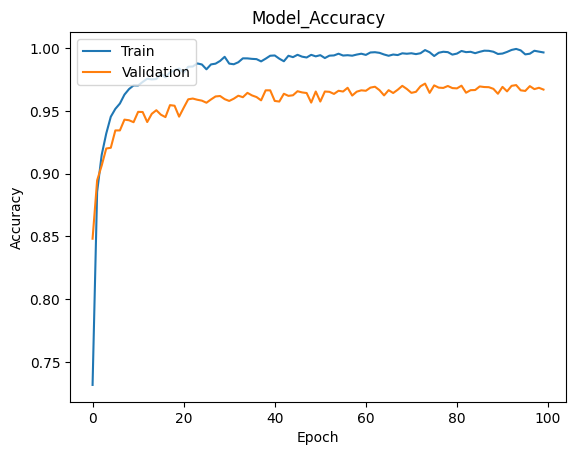

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# To get more accuracy neurons are added to them but overfitting happens so overcome it we use dropout.

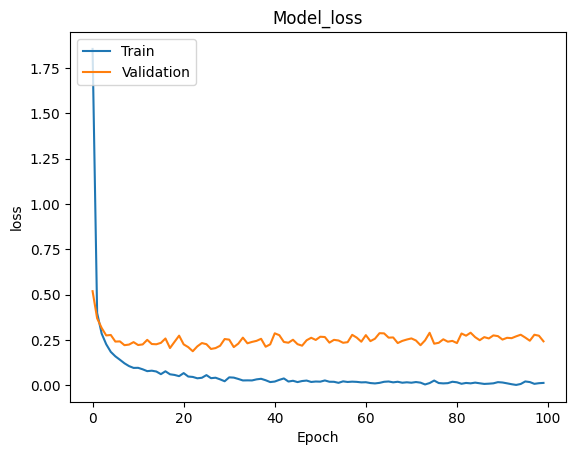

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Model Evaluation:

In [ ]:
### np.argmax takes the high probability column in the y hat and goes to the

In [ ]:
y_hat_train_dense = np.argmax(model.predict(x_train), axis =1)
y_hat_test_dense = np.argmax(model.predict(x_test), axis=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_hat_test_dense

array([2, 2, 0, ..., 5, 0, 9])

In [ ]:
y_hat_train_dense

array([2, 9, 2, ..., 9, 6, 7])

In [ ]:
model_eval(y_train, y_hat_train_dense)

The accuracy of the model is: 1.0
[[3346    0    0    0    0    0    0    0    1    0]
 [   0 3735    0    0    0    0    0    0    0    0]
 [   2    2 3310    6    0    0    1    1   16    1]
 [   0    0    0 3484    0    1    0    0    1    7]
 [   0    0    0    0 3274    0    0    1    0    1]
 [   0    0    0    0    0 2991    0    0    3    1]
 [   2    0    0    0    0    0 3261    0    4    0]
 [   0    3    0    1    0    0    0 3536    0    1]
 [   0    0    0    0    0    0    0    0 3246    0]
 [   0    0    0    3    4    0    0    0    3 3351]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      0.99      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00      1.00      1.00      3267
  

In [ ]:
model_eval(y_test, y_hat_test_dense)

The accuracy of the model is: 0.97
[[771   0   1   1   1   2   2   1   3   3]
 [  0 938   1   2   0   0   4   1   3   0]
 [  4   3 798  11   1   2   2   6   9   2]
 [  0   1   0 830   0   6   0   5  13   3]
 [  2   3   0   0 771   0   4   4   3   9]
 [  1   1   1  21   0 754   5   0  13   4]
 [  6   0   0   0   1   3 855   0   5   0]
 [  0   5   9   1   3   4   0 827   2   9]
 [  5   5   0   8   3   2   1   1 784   8]
 [  1   1   2   3   9   5   1   6   5 794]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       785
           1       0.98      0.99      0.98       949
           2       0.98      0.95      0.97       838
           3       0.95      0.97      0.96       858
           4       0.98      0.97      0.97       796
           5       0.97      0.94      0.96       800
           6       0.98      0.98      0.98       870
           7       0.97      0.96      0.97       860
           8       0.93      0.96      0.95    